In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import mysql.connector as mysql
import warnings
import contextlib


warnings.filterwarnings("ignore")

In [2]:
user = os.environ.get('USER')
password = os.environ.get('PASSWORD')
host = os.environ.get('HOST')
database = os.environ.get('DATABASE')

In [3]:
with open('../sql/analysis.sql', 'r') as f:
    query = f.read()

In [4]:
with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    
    data = pd.read_sql(query, conn)

In [5]:
data.head()

,id_wycieczki,ilosc_uczestnikow,kwota,ilosc_dni,miasto,kraj,tematyka
0,1108,10,42783.44,13,Zagrzeb,Chorwacja,Poszukiwania Skarbów w Mieście
1,1593,10,35634.72,11,Aarhus,Dania,Kulinarna archeologia miasta
2,1325,11,35293.97,10,Malaga,Hiszpania,Zapomniane rzemiosła
3,672,8,34800.00,13,Valencia,Hiszpania,Historyczna Gra Terenowa
4,979,13,33200.99,9,Nicea,Francja,Geocaching dla Zdobywców


In [6]:
data['kwota_na_osobe_na_dzien'] = data['kwota'] / (data['ilosc_uczestnikow'] * data['ilosc_dni'])


In [7]:
sns.set(style="dark")

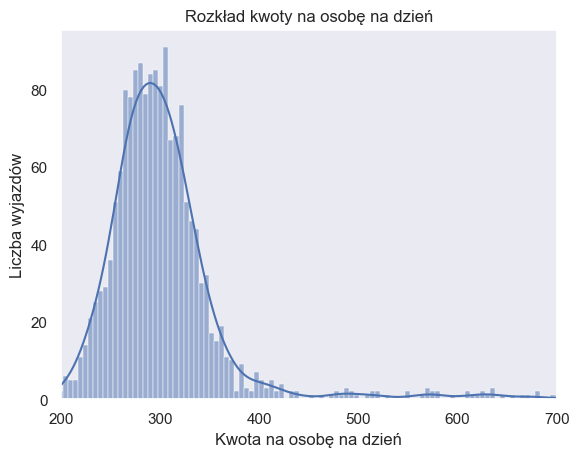

In [8]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.histplot(data=data, x='kwota_na_osobe_na_dzien', kde=True, bins=100)
    plt.xlim(200, 700)
    ax.set(xlabel='Kwota na osobę na dzień', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład kwoty na osobę na dzień')


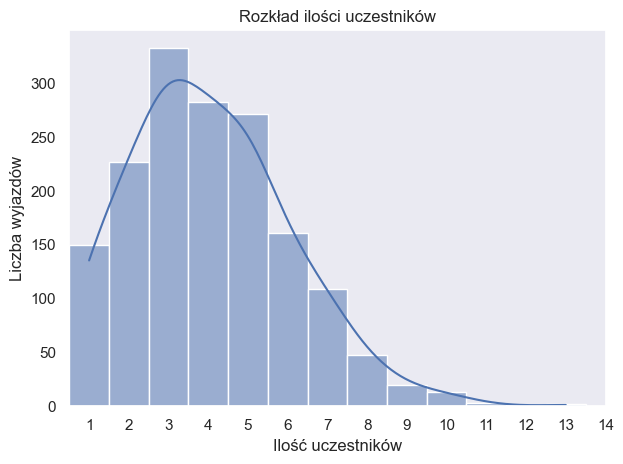

In [9]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
   ax = sns.histplot(data=data, x='ilosc_uczestnikow', kde=True, discrete=True, kde_kws={'bw_adjust': 1.5}, bins=len(data['ilosc_uczestnikow'].unique()))
   ax.set_xlim(0.5,14)
   plt.xticks(np.arange(1, 15, 1), labels=np.arange(1, 15, 1))
   ax.set(xlabel='Ilość uczestników', ylabel='Liczba wyjazdów')
   ax.set_title('Rozkład ilości uczestników')
   plt.tight_layout()  

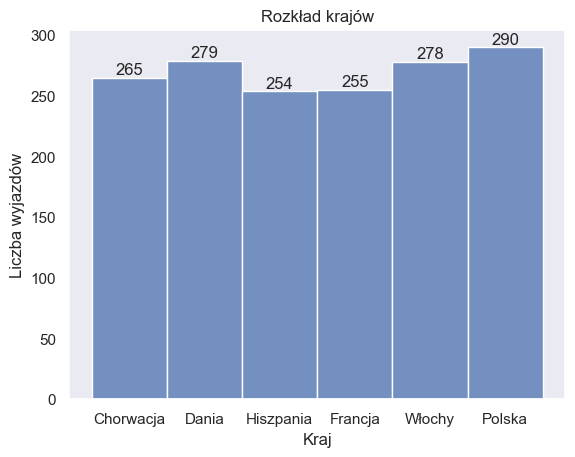

In [10]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.histplot(x='kraj', data=data)
    ax.set(xlabel='Kraj', ylabel='Liczba wyjazdów')
    ax.bar_label(ax.containers[0])
    ax.set_title('Rozkład krajów')

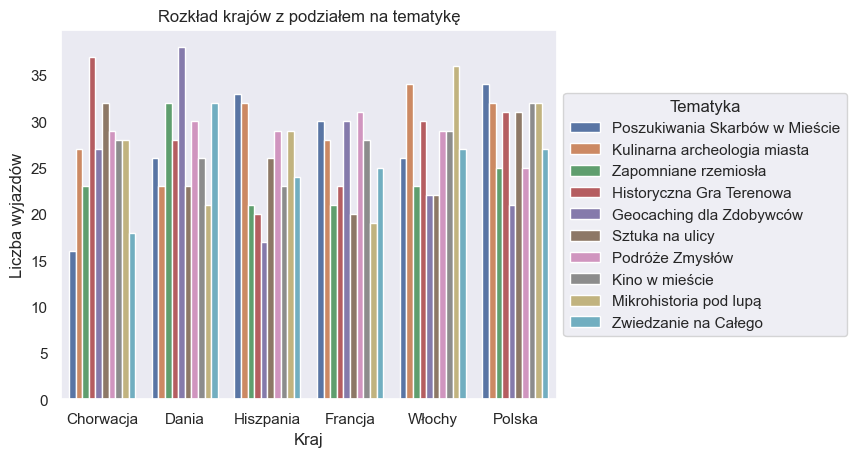

In [11]:

with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.countplot(x='kraj', data=data, hue='tematyka', palette='deep')


    ax.legend(title='Tematyka', loc='center right', bbox_to_anchor=(1.6, 0.5))
    ax.set(xlabel='Kraj', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład krajów z podziałem na tematykę')